
SVM model: Y = w0 + w1*x1 + w2*x2
截距: w0=[-3.89974328]
系数: w1=[[0.72181271 0.34692337]]
分类准确度：1.0000


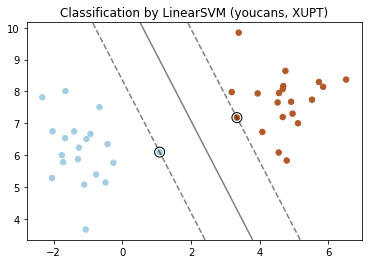

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=40, centers=2, random_state=27)  # 产生数据集: 40个样本, 2类
modelSVM = SVC(kernel='linear', C=100)  # SVC 建模：使用 SVC类，线性核函数
# modelSVM = LinearSVC(C=100)  # SVC 建模：使用 LinearSVC类，运行结果同上
modelSVM.fit(X, y)  # 用样本集 X,y 训练 SVM 模型

print("\nSVM model: Y = w0 + w1*x1 + w2*x2") # 分类超平面模型
print('截距: w0={}'.format(modelSVM.intercept_))  # w0: 截距, YouCans
print('系数: w1={}'.format(modelSVM.coef_))  # w1,w2: 系数, XUPT
print('分类准确度：{:.4f}'.format(modelSVM.score(X, y)))  # 对训练集的分类准确度

# 绘制分割超平面和样本集分类结果
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)  # 散点图，根据 y值设置不同颜色
ax = plt.gca()  # 移动坐标轴
xlim = ax.get_xlim()  # 获得Axes的 x坐标范围
ylim = ax.get_ylim()  # 获得Axes的 y坐标范围
xx = np.linspace(xlim[0], xlim[1], 30)  # 创建等差数列，从 start 到 stop，共 num 个
yy = np.linspace(ylim[0], ylim[1], 30)  #
YY, XX = np.meshgrid(yy, xx)  # 生成网格点坐标矩阵 XUPT
xy = np.vstack([XX.ravel(), YY.ravel()]).T  # 将网格矩阵展平后重构为数组
Z = modelSVM.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])  # 绘制决策边界和分隔
ax.scatter(modelSVM.support_vectors_[:, 0], modelSVM.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')  # 绘制 支持向量
plt.title("Classification by LinearSVM (youcans, XUPT)")
plt.show()


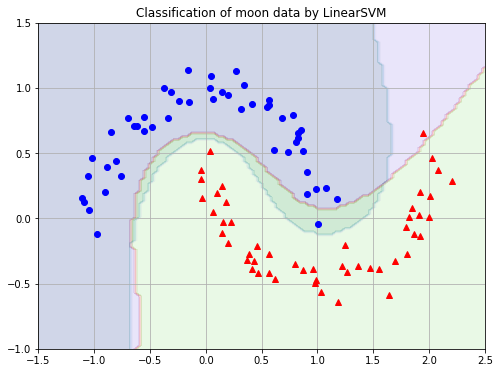

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.datasets import make_moons

# 数据准备：生成训练数据集，生成等高线网格数据
X, y = make_moons(n_samples=100, noise=0.1, random_state=27) # 生成数据集
x0s = np.linspace(-1.5, 2.5, 100)  # 创建等差数列，从 start 到 stop，共 num 个
x1s = np.linspace(-1.0, 1.5, 100)  # start, stop 根据 Moon 数据范围选择确定
x0, x1 = np.meshgrid(x0s, x1s)  # 生成网格点坐标矩阵
Xtest = np.c_[x0.ravel(), x1.ravel()]  # 返回展平的一维数组
# SVC 建模，训练和输出
modelSVM1 = SVC(kernel='poly', degree=3, coef0=0.2)  # 'poly' 多项式核函数
modelSVM1.fit(X, y)  # 用样本集 X,y 训练支持向量机 1
yPred1 = modelSVM1.predict(Xtest).reshape(x0.shape)  # 用模型 1 预测分类结果
# NuSVC 建模，训练和输出
modelSVM2 = NuSVC(kernel='rbf', gamma='scale', nu=0.1)  #'rbf' 高斯核函数
modelSVM2.fit(X, y)  # 用样本集 X,y 训练支持向量机 2
yPred2 = modelSVM2.predict(Xtest).reshape(x0.shape)  # 用模型 2 预测分类结果

fig, ax = plt.subplots(figsize=(8, 6))  
ax.contourf(x0, x1, yPred1, cmap=plt.cm.brg, alpha=0.1) # 绘制模型1 分类结果
ax.contourf(x0, x1, yPred2, cmap='PuBuGn_r', alpha=0.1) # 绘制模型2 分类结果
ax.plot(X[:,0][y==0], X[:,1][y==0], "bo")  # 按分类绘制数据样本点
ax.plot(X[:,0][y==1], X[:,1][y==1], "r^")  # XUPT
ax.grid(True, which='both')
ax.set_title("Classification of moon data by LinearSVM")
plt.show()
